# Info

PfHT is quite different from GLUT5, especially in this TM1 - TM2 loop region. I am having trouble with the string simulations in this occluded space for this region.

What I could see in TMD is that I pass through the occluded state in EC and IC gate space during the sims, but I want to see how important this loop region actually is, and can I potentially skip the occluded state for string simulations. 

Questions to answer: 
How different will the protein be if I take points along the EC / IC gate space that look the same? (eg, in EC/IC space they look like I am taking the same points, but what about the rest of the protein?)

## part 1 - repeat graphs from `steered_analysis`

Good to just have all of this info in here

In [1]:
import sys
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt

sys.path.insert(1, '../../../string/analysis/scripts')
from gate_functions import *

returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists


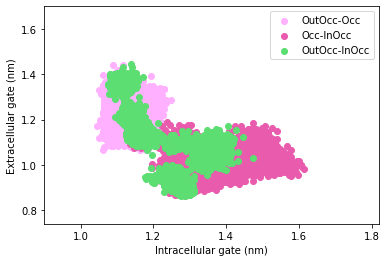

In [52]:
### Out Occ - Occ
indir = '../../state_by_state_running/targeted_MD/influx_apo_all_heavy/OutOcc-Occ'
trajname = 'OutOcc-Occ'
color_l = ['#FFB1FF', '#E95CAD', '#72D1B7']

uni_to_gate_scatter(trajdir = indir, trajname = trajname, ext = 'xtc', uni_top= f'{indir}/{trajname}.tpr', \
                    color = color_l[0], label = trajname, scatter = True)




## Occ - In Occ
indir = '../../state_by_state_running/targeted_MD/influx_apo_all_heavy/Occ-InOcc'
trajname = 'Occ-InOcc'
uni_to_gate_scatter(trajdir = indir, trajname = trajname, ext = 'xtc', uni_top= f'{indir}/{trajname}.tpr', \
                    color = color_l[1], label = trajname, scatter = True,)




indir = '../../state_by_state_running/targeted_MD/influx_apo_all_heavy/OutOcc-InOcc'
trajname = 'OutOcc-InOcc'

## Out Occ - In Occ
uni_to_gate_scatter(trajdir = indir, trajname = trajname, ext = 'xtc', uni_top= f'{indir}/{trajname}.tpr', \
                    color = color_l[2], label = trajname, scatter = True)



We can see above that they pass through the same EC & IC space. Comparing RMSD through the simulations to the **Occluded structure**

In [53]:
occluded = mda.Universe('../ref_models/OCC.start.gro')

indir = '../../state_by_state_running/targeted_MD/influx_apo_all_heavy'
trajname_l = ["OutOcc-Occ", "Occ-InOcc", "OutOcc-InOcc"]
traj_l = []

for trajname in trajname_l:
    traj_l.append(mda.Universe(f"{indir}/{trajname}/{trajname}.tpr", f"{indir}/{trajname}/{trajname}.skip25.xtc"))

In [54]:
import MDAnalysis.analysis.rms
rmsd_l = []

for traj in traj_l:
    RMSD = MDAnalysis.analysis.rms.RMSD(reference=occluded.select_atoms("protein"), \
                                        atomgroup = traj.select_atoms("protein"), \
                                        center = True, select="backbone", \
            groupselections=["backbone and (resid 1-51 or resid 265-300 or resid 118-146 or resid 364-395)",\
                             "backbone and (resid 1-205 or resid 265-455)"])  

    RMSD.run(0)
    rmsd = RMSD.rmsd.T
    rmsd_l.append(rmsd)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(0.0, 11340.0)

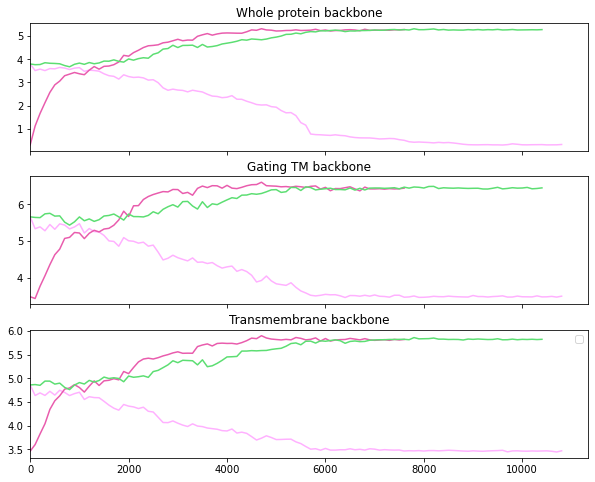

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, sharex = True, figsize = (10,8))

for n, rmsd in enumerate(rmsd_l):
    time = rmsd[1]
    ax1.plot(time, rmsd[2], label = trajname_l[n], color = color_l[n])
    ax2.plot(time, rmsd[3], color = color_l[n])
    ax3.plot(time, rmsd[4], color = color_l[n])

ax1.set_title('Whole protein backbone')
ax2.set_title("Gating TM backbone")
ax3.set_title("Transmembrane backbone")
plt.legend()
plt.xlim(0)

In terms of whole protein space, this shows that the occluded state isn't really passed through in RMSD space, although the gate space has a big overlap

## Assessing the most similar state to occluded in EC/IC space

We can find which frame of the OutOcc-InOcc simulations are closest to the occluded model

Also we can find out where we have a "fully occluded" gate and compare this to the occluded model